In [1]:
import pandas as pd

import seaborn as sns

In [4]:
# pd.test()

# Optional dependencies

### Visualization

    Matplotlib - plotting library

    Jinja2 - conditional formatting with dataframe style

    tabulate - Printing in markdown-friendly format

    seaborn - plotting 

### Computational 

    Scipy - miscellaneous statistical functions

    numba - alternative execution engine for rolling operations

    xarray - pandas like API N-diemnsional data


### Excel files

    xlrd - reading excel

    xlwt - writing excel

    xlswriter - wrinting excel

    openpyxl - reading/wrinting for xlsx files

    pyxlsb - reading for xlsb files


### HTML

    BeautifulSoup4 - HTML parse for read_html

    html5lib - HTML parse for read_html

    lxml - HTML parse for read_html

###### if you install BeautifulSoup4 you must install either lxml or html5lib or both. read_html() will not work with only BeautifulSoup4 installed.

### XML 

    lxml -XML parde for read_xml and tree builder for to_xml

### SQL database

    SQLAlchemy - SQL support for database other thsn sqlite

    psycopg2 - PostgreSQL engine for sqlalchemy

    pymysql - MYSQL engine for sqlachemy


### Other data source 

    PyTables - HDF5-based reading / writing

    blosc - Compression for HDF5

    zlib - Compression for HDF5

    fastparquet - Parquet reading / writing

    pyarrow - Parquet, ORC, and feather reading / writing

    pyreadstat - SPSS files (.sav) reading

### Access data in cloud 

    fsspec - Handling files aside from simple local and HTTP

    gcfs - Google Cloud storage access

    pandas-gbq - Google Big Query access

    s3fs - Amazon s3 access

### Clipboard

    PyQt4/PyQt5 - Clipboard I/O

    qtpy - Clipboard I/O

    xclip - Clipboard I/O on linux

    xsel - Clipboard I/O on linux

### Compression

    brotli - Brotli compression

    python-snappy - Snappy compression

    Zstandard - Zstandard compression


#### Here are just a few of the things that pandas does well:

  Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data

Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations

Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data

Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects

Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

Intuitive merging and joining data sets

Flexible reshaping and pivoting of data sets

Hierarchical labeling of axes (possible to have multiple labels per tick)

Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format

Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting, and lagging.

#### Some other notes

pandas is fast. Many of the low-level algorithmic bits have been extensively tweaked in Cython code. However, as with anything else generalization usually sacrifices performance. So if you focus on one feature for your application you may be able to create a faster specialized tool.

pandas is a dependency of statsmodels, making it an important part of the statistical computing ecosystem in Python.

pandas has been used extensively in production in financial applications.

### Data structures

1 Series

    1D labeled homogeneously-typed array

2 DataFrame

    General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column

# LET'S GET STARTED

In [6]:
data = pd.read_csv('/home/afroteop/Documents/pythondsp-pandasguide-b936c3b43406/data/cast.csv')

In [7]:
data.head(2)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0


In [15]:
for col in data.columns:
    series = data[col]

In [12]:
print(col)

n


Did you know?

Each column in a DataFrame is a Series

In [17]:
data['title'].head()

0          Closet Monster
1         Suuri illusioni
2     Battle of the Sexes
3    Secret in Their Eyes
4              Steve Jobs
Name: title, dtype: object

In [20]:
data['n'].max()

701.0

In [25]:
data1 = data[data['title'] == 'Closet Monster']

data1['n'].describe()

count     2.000000
mean     16.000000
std      21.213203
min       1.000000
25%       8.500000
50%      16.000000
75%      23.500000
max      31.000000
Name: n, dtype: float64

In [28]:
# get data and download it

titanic = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv')

titanic.to_csv('titanic.csv')

In [75]:
#  now we can access our data offline

titanic = pd.read_csv('titanic.csv')

In [33]:
titanic.shape

(891, 13)

In [35]:
# export the data in excel

titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

# read the excel

titanic_excel = pd.read_excel("titanic.xlsx")

titanic_excel.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Back to our data

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [53]:
age_sex = titanic

# Explore Target distribution 

sns.catplot(x="Age", kind="count", data=age_sex)

Getting passengers in cubes

In [58]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]

class_23.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [59]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

class_23.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


I want to work with passenger data for which the age is known.

In [67]:
age_no_na = titanic[titanic["Age"].notna()]

len(age_no_na)

714

I want to work with names that are above 35 years



In [65]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]

adult_names

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
13                           Andersson, Mr. Anders Johan
15                      Hewlett, Mrs. (Mary D Kingcome) 
                             ...                        
865                             Bystrom, Mrs. (Karolina)
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
873                          Vander Cruyssen, Mr. Victor
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
885                 Rice, Mrs. William (Margaret Norton)
Name: Name, Length: 217, dtype: object

I’m interested in rows 10 till 25 and columns 3 to 5.

In [68]:
titanic.iloc[9:25, 2:5]

,Survived,Pclass,Name
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)"
10,1,3,"Sandstrom, Miss. Marguerite Rut"
11,1,1,"Bonnell, Miss. Elizabeth"
12,0,3,"Saundercock, Mr. William Henry"
13,0,3,"Andersson, Mr. Anders Johan"
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina"
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)"
16,0,3,"Rice, Master. Eugene"
17,1,2,"Williams, Mr. Charles Eugene"
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande..."


When selecting specific rows and/or columns with loc or iloc, new values can be assigned to the selected data. For example, to assign the name anonymous to the first 3 elements of the third column:

In [76]:
titanic.iloc[0:3, 4] = "anonymous"

titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Plotting

In [61]:
# collect air quality data and save it to a csv file

# air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv')

# air_quality.to_csv('air_quality.csv')

air_quality = pd.read_csv('air_quality.csv')

In [4]:
air_quality.head(3)

,Unnamed: 0,datetime,station_antwerp,station_paris,station_london
0,0,2019-05-07 02:00:00,NaN,NaN,23.0
1,1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2,2019-05-07 04:00:00,45.0,27.7,19.0


In [62]:
air_quality = air_quality.drop('Unnamed: 0', axis=1)

<AxesSubplot:>

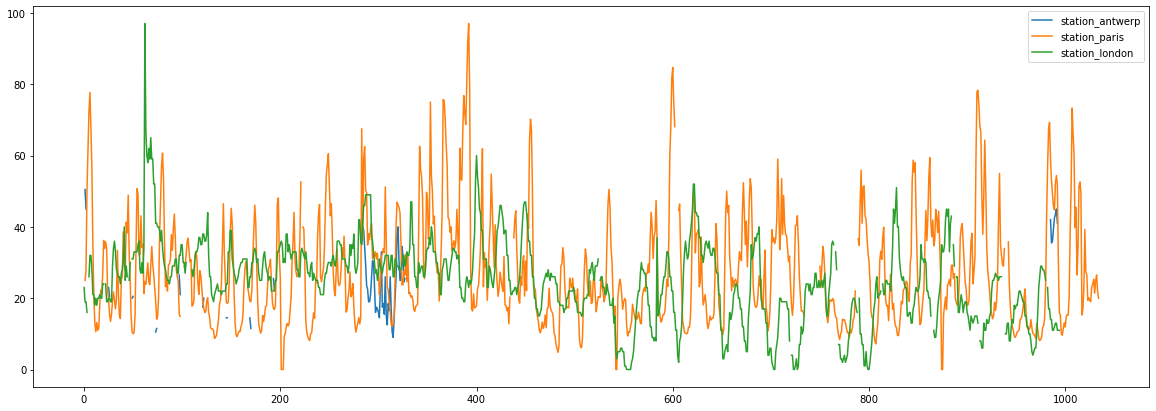

In [8]:
air_quality.plot(figsize=(20,7))

<AxesSubplot:>

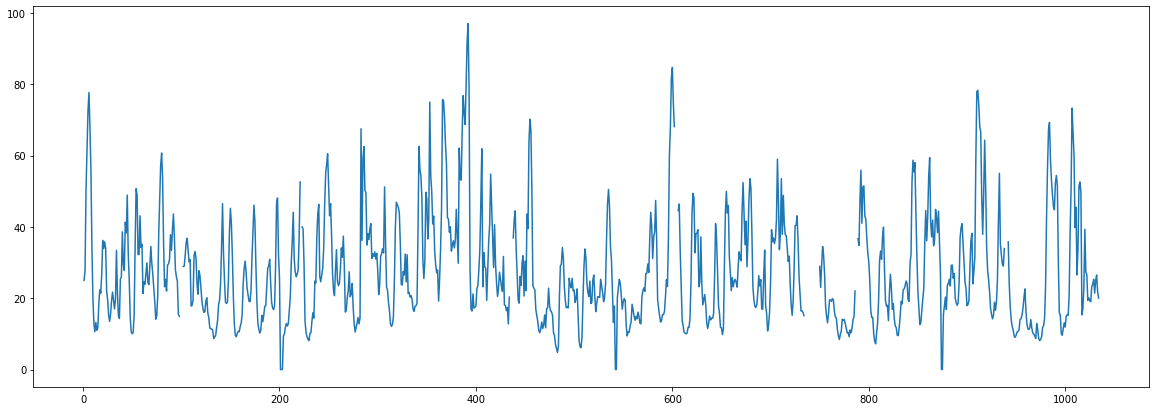

In [14]:
station_paris = air_quality['station_paris']

station_paris.plot(figsize=(20,7))

Plotting a scatterplot

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

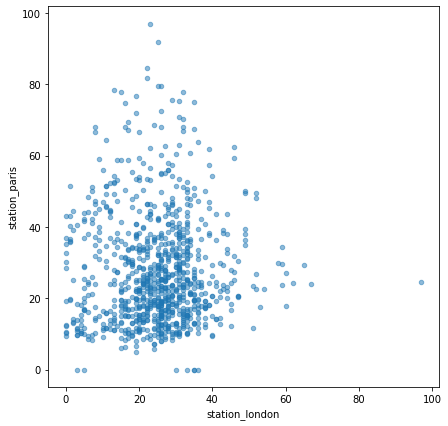

In [17]:
air_quality.plot.scatter(x='station_london',y='station_paris', alpha=0.5,figsize=(7,7))

Apart from the default line plot when using the plot function, a number of alternatives are available to plot data. Let’s use some standard Python to get an overview of the available plot methods:

In [18]:
[
    method_name

    for method_name in dir (air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:>

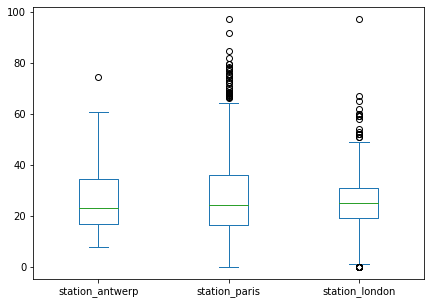

In [21]:
air_quality.plot.box(figsize=(7,5))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

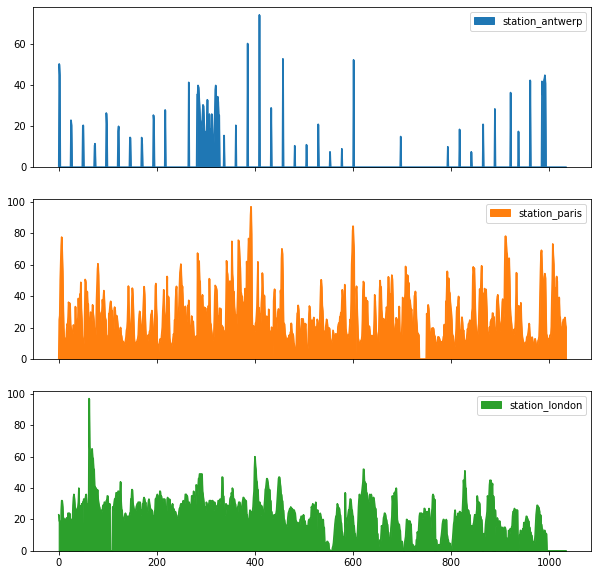

In [24]:
from matplotlib.pyplot import subplot, subplots


air_quality.plot.area(figsize=(10,10), subplots=True)

<AxesSubplot:ylabel='Density'>

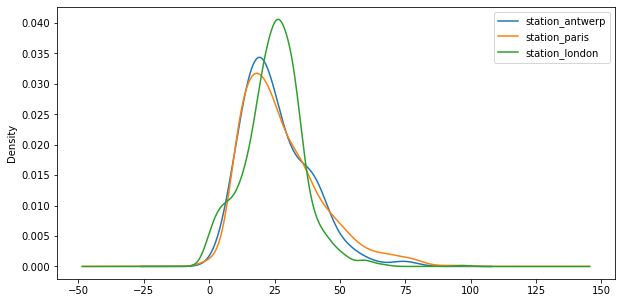

In [27]:
air_quality.plot.kde(figsize=(10,5))

<AxesSubplot:ylabel='Density'>

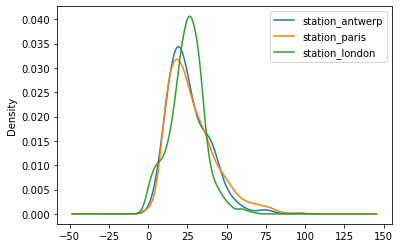

In [39]:
air_quality.plot.density()

array([<AxesSubplot:ylabel='station_paris'>], dtype=object)

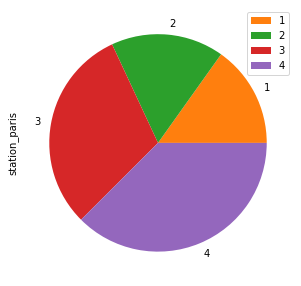

In [34]:
air_qualitys = air_quality.head()

air_qualitys.plot.pie(figsize=(10,5),subplots=True, y='station_paris')

<AxesSubplot:xlabel='station_paris', ylabel='station_london'>

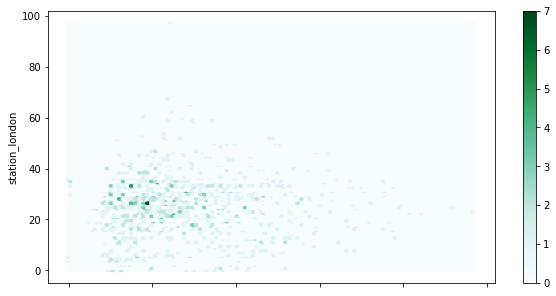

In [44]:
air_quality.plot.hexbin(x='station_paris',y='station_london',figsize=(10,5))

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

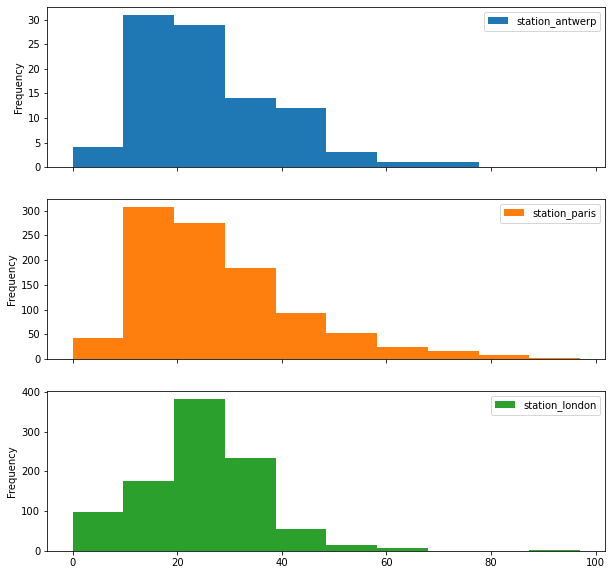

In [49]:
air_quality.plot.hist(figsize=(10,10),subplots=True)

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

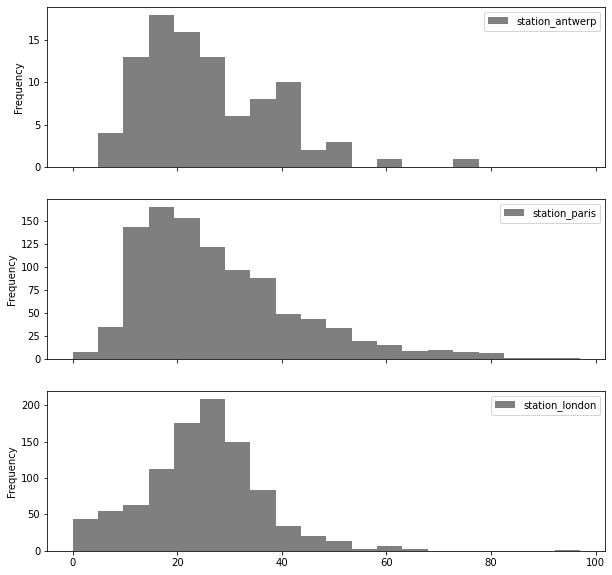

In [54]:
air_quality.plot.hist(figsize=(10,10),color="k", alpha=0.5, bins=20,subplots=True)

### creating new columns derived from existing columns

Express the  concentration N02 of the station in London in mg/m

In [63]:
air_quality["antwerp_mg/cubic"] = air_quality["station_antwerp"] * 1.882

air_quality["paris_mg/cubic"] = air_quality["station_paris"] * 1.882

air_quality["london_mg/cubic"] = air_quality["station_london"] * 1.882

air_quality.head(2)

,datetime,station_antwerp,station_paris,station_london,antwerp_mg/cubic,paris_mg/cubic,london_mg/cubic
0,2019-05-07 02:00:00,NaN,NaN,23.0,NaN,NaN,43.286
1,2019-05-07 03:00:00,50.5,25.0,19.0,95.041,47.05,35.758


In [58]:
air_quality.isnull().sum()

datetime              0
station_antwerp     940
station_paris        31
station_london       66
london_mg/cubic      66
paris_mg/cubic       31
antwerp_mg/cubic    940
dtype: int64

In [59]:
len(air_quality)

1035

From above we have null values form Antwerp and our total rows are 1035

### Getting ratios

In [65]:
air_quality['ratio_paris_london'] = (air_quality['station_paris']/air_quality['station_london'])

air_quality["ratio_paris_antwerp"] = (air_quality["station_paris"] / air_quality["station_antwerp"])

air_quality["ratio_london_antwerp"] = (air_quality["station_london"] / air_quality["station_antwerp"])



air_quality.head()

,datetime,station_antwerp,station_paris,station_london,antwerp_mg/cubic,paris_mg/cubic,london_mg/cubic,ratio_paris_london,ratio_paris_antwerp,ratio_london_antwerp
0,2019-05-07 02:00:00,NaN,NaN,23.0,NaN,NaN,43.286,NaN,NaN,NaN
1,2019-05-07 03:00:00,50.5,25.0,19.0,95.041,47.0500,35.758,1.315789,0.495050,0.376238
2,2019-05-07 04:00:00,45.0,27.7,19.0,84.690,52.1314,35.758,1.457895,0.615556,0.422222
3,2019-05-07 05:00:00,NaN,50.4,16.0,NaN,94.8528,30.112,3.150000,NaN,NaN
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN,116.4958,NaN,NaN,NaN,NaN


### calculate summary statistics

In [66]:
air_quality.mean()

/tmp/ipykernel_93799/2442204918.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  air_quality.mean()


station_antwerp         25.778947
station_paris           27.740538
station_london          24.777090
antwerp_mg/cubic        48.515979
paris_mg/cubic          52.207692
london_mg/cubic         46.630483
ratio_paris_london            inf
ratio_paris_antwerp      1.304051
ratio_london_antwerp     1.316521
dtype: float64

In [69]:
air_quality['station_london'].mean()

24.777089783281735

Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the DataFrame.agg() method:

In [73]:
air_quality.agg(
    {
    "station_antwerp":["min","max","mean","median","skew"],

    "station_paris":["min","max","mean","median","skew"],

    "station_london":["min","max","mean","median","skew"],
    }
)

,station_antwerp,station_paris,station_london
min,7.500000,0.000000,0.000000
max,74.500000,97.000000,97.000000
mean,25.778947,27.740538,24.777090
median,23.000000,24.150000,25.000000
skew,1.082260,1.161128,0.375548


### Aggregating statistics grouped by catergory

In [82]:
titanic = pd.read_csv('titanic.csv')

In [78]:
titanic[['Age','Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


Getting mean of all columns through grouping

In [83]:
titanic = titanic.drop('Unnamed: 0', axis=1)

titanic = titanic.drop('PassengerId', axis=1)

titanic.groupby("Sex").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


mean ticket fare price for each of the sex and cabin class combinations

In [84]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

Getting value count for a column

In [86]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

The value_counts() method counts the number of records for each category in a column.